# 워드 클라우드

* WordCloud 설치 : **pip install wordcloud**

In [1]:
! pip install wordcloud

     ---------------------------------------- 153.1/153.1 kB ? eta 0:00:00


데이터 파일
 - 대한민국_헌법_ words.txt
 - korea_law_mask.png
 - en-a_new_hope.txt
 - stormtrooper_mask.png

Text(0.5, 1.0, '한글 테스트')

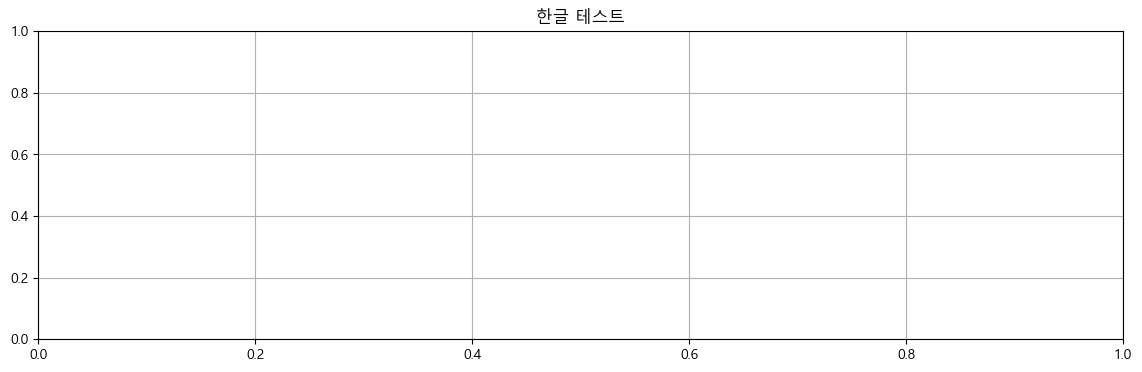

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (14,4)


font_path = 'C:/Windows/Fonts/Malgun.ttf'
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
# font_path = '/Users/qkboo/Library/Fonts/NanumGothic.otf'
fontname = fm.FontProperties(fname=font_path, size=18).get_name()  # 폰트 패밀리 이름!

# matplotlib 한글 출력 확인용 테스트
plt.rcParams["font.family"] = fontname
plt.rcParams['axes.unicode_minus'] = False
plt.title('한글 테스트')

In [4]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

## Mask 만들기

1. gimp
2. white 배경의 검정 마스크

In [6]:
flag_mask = np.array(Image.open('data/korea_law_mask.png'))

In [8]:
from IPython.display import Image as IPImage

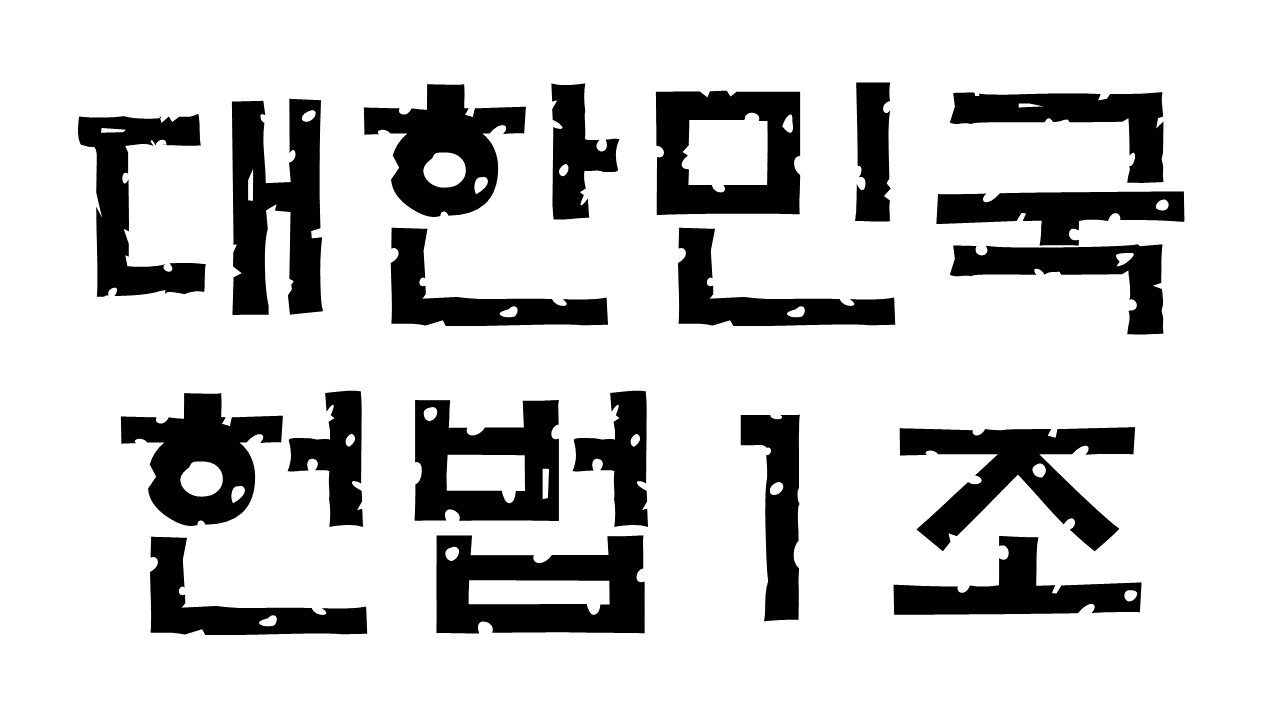

In [9]:
IPImage('data/korea_law_mask.png')

# 대한민국 헌법

In [13]:
with open('data/대한민국_헌법_ words.txt', 'rt', encoding='utf-8') as f:
    text = f.read()

In [14]:
text[:10]

'전문 유구한 역사와'

In [15]:
text = text.split(' ') # 단어(의 목록), tokenizing
text[:10]

['전문',
 '유구한',
 '역사와',
 '전통에',
 '빛나는',
 '대한국민은',
 '3·1운동으로',
 '건립된',
 '대한민국임시정부의',
 '법통과']

In [16]:
len(text)

4471

## 빈도 만들기: Counter

In [17]:
from collections import Counter

In [18]:
text_counter = Counter(text) # 현재 단어!

In [19]:
text_counter.most_common?

Signature: text_counter.most_common(n=None)
Docstring:
List the n most common elements and their counts from the most
common to the least.  If n is None, then list all element counts.

>>> Counter('abracadabra').most_common(3)
[('a', 5), ('b', 2), ('r', 2)]
File:      c:\users\sbauser\.pyenv\pyenv-win\versions\3.9.13\lib\collections\__init__.py
Type:      method


In [20]:
text_counter.most_common(10) # 제일 많이 나온 빈도수 10개만 나옴(빈도수 별로 sorting한 후 개수만큼 돌려줌

[('법률로', 101),
 ('한다.', 71),
 ('있다.', 67),
 ('정하는', 55),
 ('또는', 51),
 ('모든', 41),
 ('정한다.', 40),
 ('가진다.', 35),
 ('국가는', 34),
 ('바에', 34)]

## 빈도 만들기: Series

In [21]:
# 텍스트 단어 빈도수2
import pandas as pd

text_bin = pd.Series(text)

In [22]:
text_bin[:3]

0     전문
1    유구한
2    역사와
dtype: object

In [23]:
text_bin[text_bin.duplicated()] # 2250자가 중복됨

40      바탕으로
47        모든
52       하고,
82       자유와
112       모든
        ... 
4463      시행
4464     당시의
4467     헌법에
4468      따른
4470     본다.
Length: 2250, dtype: object

In [26]:
text_counter = text_bin.value_counts()
text_counter

법률로       101
한다.        71
있다.        67
정하는        55
또는         51
         ... 
의장          1
제51조        1
명시해야        1
이유를         1
자치규칙으로      1
Length: 2221, dtype: int64

In [27]:
text_counter[:10] # top10

법률로     101
한다.      71
있다.      67
정하는      55
또는       51
모든       41
정한다.     40
가진다.     35
국가는      34
바에       34
dtype: int64

In [28]:
wc = WordCloud(background_color='white', 
               font_path= font_path,
               max_words=2000, 
               mask=flag_mask) # 마스킹이 안됐다고 하시넹.. 마스킹 개념 공부하기!
wc.generate_from_frequencies(dict(text_counter[:100]))
# wc = wc.generate(''.join(results))
# wc.words_

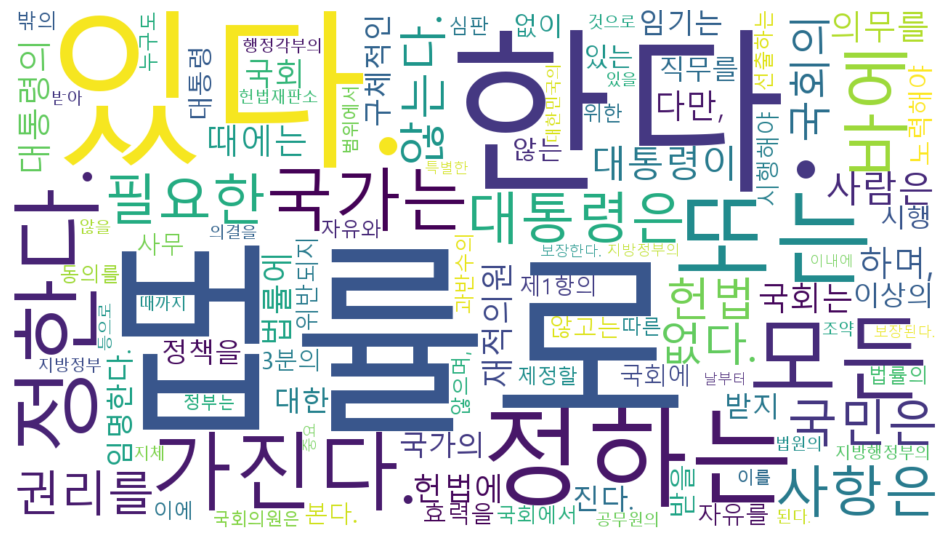

In [29]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
with open('data/대한민국_헌법_ words.txt', 'rt', encoding='utf-8') as f:
    text1 = f.read()

In [ ]:
# 좀 알려달라고 하깅

## 스타워즈

In [31]:
text = open('data/en-a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/en-stormtrooper_mask.png'))

In [32]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [33]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [34]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

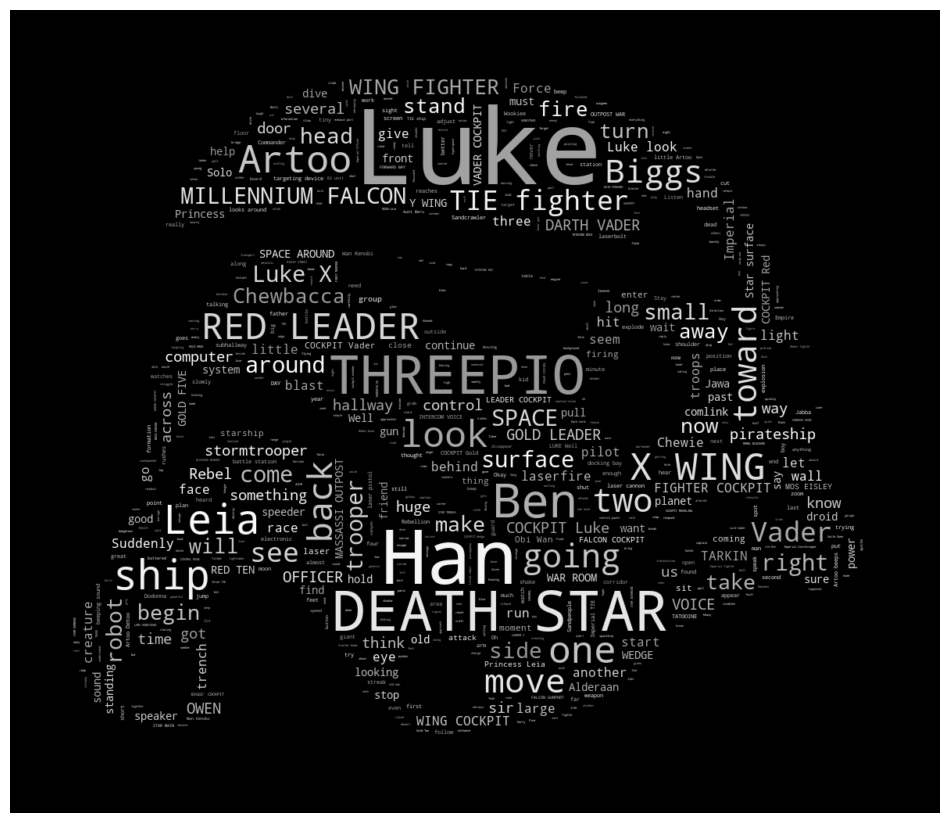

In [35]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()